In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from nnpde2diff1d import NNPDE2DIFF1D
from pde2diff1d import PDE2DIFF1D

In [2]:
%%javascript
MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## The problem

### Create the training data.

In [3]:
nx = 80
nt = 80
xt = np.linspace(0, 1, nx)
tt = np.linspace(0, 1, nt)
x_train = np.array(list(zip(np.tile(xt, nt), np.repeat(tt, nx))))

### Read the differential equation.

In [4]:
eq_name = 'diff1d_sine'
eq = PDE2DIFF1D(eq_name)

### Compute the analytical solution.

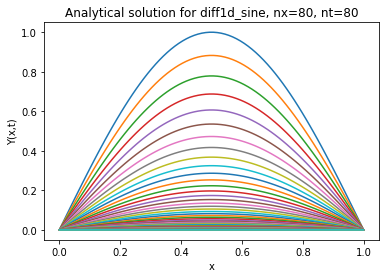

In [5]:
n = nx*nt
Ya = np.zeros(n)
for i in range(n):
    Ya[i] = eq.Yaf(x_train[i])
Ya = Ya.reshape((nt, nx))
for i in range(nt):
    plt.plot(xt, Ya[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Y(x,t)')
#plt.legend(loc='right')
plt.title('Analytical solution for %s, nx=%d, nt=%d' % (eq_name, nx, nt));

## BFGS (default)

In [6]:
net1 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net1.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net1.res)

         Current function value: 4.401366
         Iterations: 2075
         Function evaluations: 2281
         Gradient evaluations: 2269
4h 51min ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 4.401366057597205
 hess_inv: array([[ 3.16860771e-03,  2.16447362e-03,  2.76078606e-05, ...,
         2.38422283e+01, -2.69513976e+01, -2.89519092e+01],
       [ 2.16107261e-03,  1.63761815e-03,  1.44264483e-05, ...,
         1.24485482e+01, -1.41153028e+01, -1.52426829e+01],
       [ 2.77930068e-05,  1.45990317e-05,  7.59531640e-07, ...,
         2.86378625e-01, -3.24579100e-01, -3.51205848e-01],
       ...,
       [ 2.38387685e+01,  1.24571684e+01,  2.85822534e-01, ...,
         3.39251587e+05, -3.81657027e+05, -4.06676343e+05],
       [-2.69495097e+01, -1.41266813e+01, -3.23941419e-01, ...,
        -3.81678747e+05,  4.29428314e+05,  4.57655012e+05],
       [-2.89526874e+01, -1.52574178e+01, -3.50493808e-01, ...,
        -4.06729111e+05,  4.57688299e+05,  4.87920944e+05]

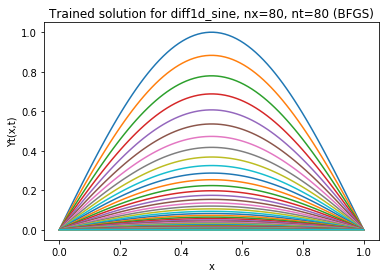

In [9]:
Yt1 = net1.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
#plt.legend(loc='right')
plt.title('Trained solution for %s, nx=%d, nt=%d (%s)' % (eq_name, nx, nt, trainalg));

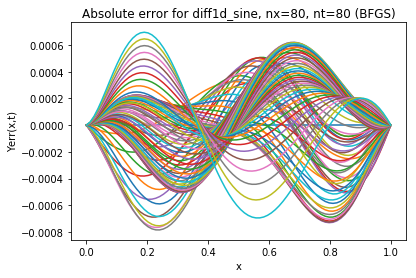

In [10]:
Y_err1 = Yt1 - Ya
for i in range(nt):
    plt.plot(xt, Y_err1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
#plt.legend(loc='right')
plt.title('Absolute error for %s, nx=%d, nt=%d (%s)' % (eq_name, nx, nt, trainalg));